### 1. **Импорт библиотек**

In [2]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]


### 2. **Загрузка изображения**

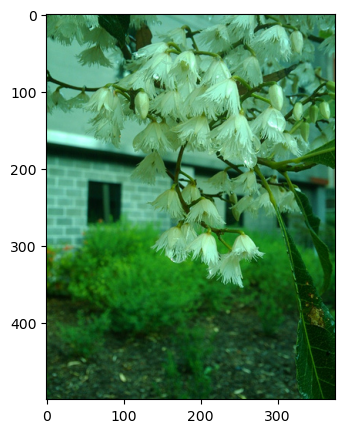

In [4]:

img = cv2.imread('img/green.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


### 3. **White Patch Algorithm**

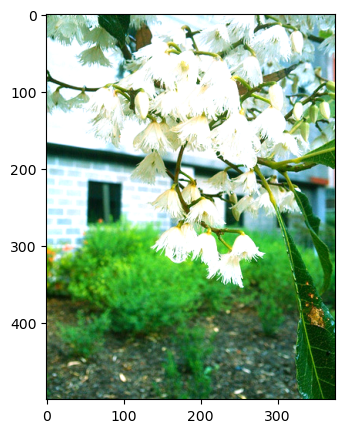

In [26]:
# Выбираем пиксели, которые должны быть белыми, и вычисляем коэффициенты
row, col = 187, 250  # Позиции белого пикселя внутри изображения
white = img[row, col, :]  # Извлечение значений цвета в этом пикселе
coeffs = 255.0 / white  # Коэффициенты для корректировки цветовых каналов

# Применение цветокоррекции для баланса белого
balanced = img.copy().astype(np.float32)
balanced[:, :, 0] *= coeffs[0]
balanced[:, :, 1] *= coeffs[1]
balanced[:, :, 2] *= coeffs[2]

# Приведение значений к диапазону [0, 255] и типу uint8
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Отображение результата
plt.imshow(balanced)
plt.show()

### 4. **Gray World Algorithm**

In [28]:

# Загрузка изображения
img = cv2.imread('img/green.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Вычисление средних значений для каждого цветового канала
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])


In [30]:

# Примем коэффициент для самого яркого канала равным 1
max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b


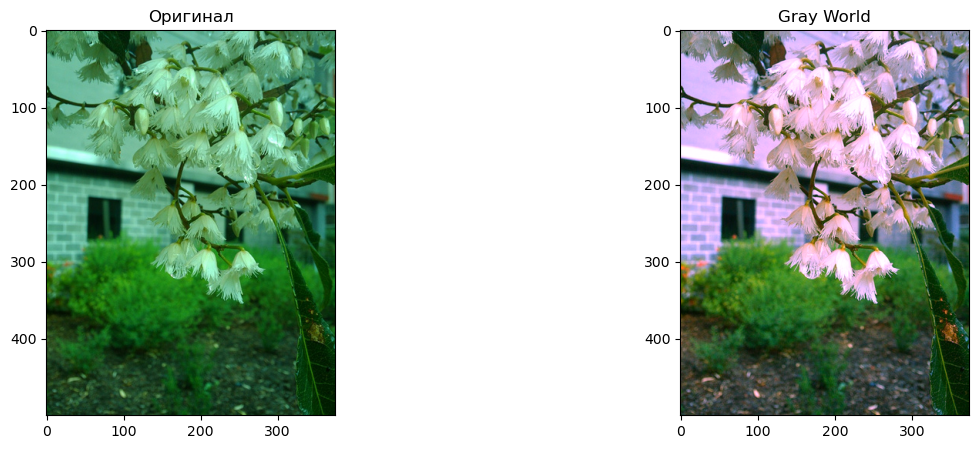

In [32]:

# Применение цветового балансирования
balanced = img.copy().astype(np.float32)
balanced[:, :, 0] *= kr  # Красный канал
balanced[:, :, 1] *= kg  # Зеленый канал
balanced[:, :, 2] *= kb  # Синий канал

# Нормализация значений и преобразование к uint8
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Отображение оригинального и скорректированного изображений
plt.subplot(121), plt.imshow(img), plt.title("Оригинал")
plt.subplot(122), plt.imshow(balanced), plt.title("Gray World")
plt.show()


### 5. **Scale-by-Max Algorithm**

In [52]:

# Загрузка изображения
img = cv2.imread('img/green_unbalanced.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Вычисление максимальных значений для каждого цветового канала
max_r = np.max(img[:, :, 0])  # Красный канал
max_g = np.max(img[:, :, 1])  # Зеленый канал
max_b = np.max(img[:, :, 2])  # Синий канал


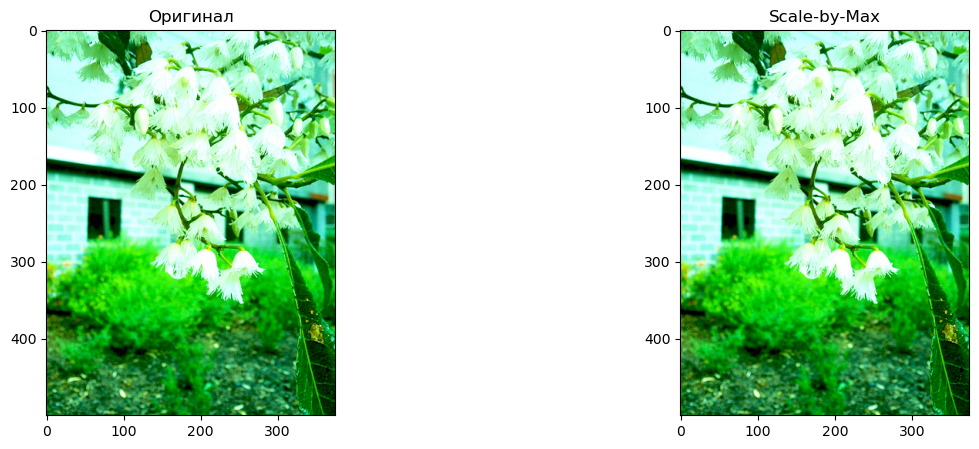

In [54]:

# Применение масштабирования по максимуму
balanced = img.copy().astype(np.float32)
balanced[:, :, 0] = (balanced[:, :, 0] / max_r) * 255
balanced[:, :, 1] = (balanced[:, :, 1] / max_g) * 255
balanced[:, :, 2] = (balanced[:, :, 2] / max_b) * 255

# Нормализация значений и преобразование к uint8
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Отображение оригинального и скорректированного изображений
plt.subplot(121), plt.imshow(img), plt.title("Оригинал")
plt.subplot(122), plt.imshow(balanced), plt.title("Scale-by-Max")
plt.show()
